## Στοιχεία Ομάδας

<table align="left">
    <tr align="left"><th>Surname</th><th>Name</th><th>Student ID</th></tr>
    <tr><td>Korkovili</td><td>Ioanna</td><td>03115078</td></tr>
    <tr><td>Xanthi</td><td>Eleni</td><td>03115054</td></tr>
    <tr><td>Tsagkarakis</td><td>Stylianos</td><td>03115180</td></tr>
</table>

# Εισαγωγή
Στα εργαστήρια φέτος δουλέψαμε με τη βιβλιοθήκη TensorFlow 1 και το σύνολο δεδομένων CIFAR-10.

Ο βασικός στόχος της παρούσας άσκησης είναι η εξοικείωση με τη βιβλιοθήκη **TensorFlow 2**. Κάθε ομάδα θα δουλέψει σε ένα διαφορετικό υποσύνολο του συνόλου δεδομένων **CIFAR-100**.

# TensorFlow 2 (vs TensorFlow 1)

![alt text](https://miro.medium.com/max/4928/1*-QTg-_71YF0SVshMEaKZ_g.png)
Η βιβλιοθήκη TensorFlow 2 διαδέχθηκε την TensorFlow 1 τον Οκτώβριο του 2019 και η τελευταία έκδοσή της αυτή τη στιγμή είναι η 2.1.0 (8 Ιανουαρίου 2020). 

Οι δύο πιο σημαντικές διαφορές του TensorFlow 2 σε σχέση με το TensorFlow 1 είναι οι εξής:

1. **Απλοποίηση της χρήσης - Keras API**: το tf2 χρησιμοποιεί πλέον ως high-level API το tf.keras, δηλαδή τη δική του υλοποίηση της προδιαγραφής API του Keras. Επίσης διάφορα δομοστοιχεία του tf1 αφαιρέθηκαν, συγχωνεύθηκαν ή μετακινήθηκαν σε υποπακέτα ώστε να “καθαρίσει” o ονοματοχώρος tf.*.

2. **Πρόθυμη εκτέλεση (Eager execution)**: στο tf1 το γράψιμο του κώδικα χωρίζεται σε δύο μέρη, στον ορισμό του υπολογιστικού γράφου και στη συνέχεια στον ορισμό μιας συνεδρίας (session) για την εκτέλεσή του. Tο tf2, όπως συνήθως και η Python, εκτελεί πρόθυμα τον κώδικα και δεν χρειάζεται ξεχωριστός ορισμός συνεδριών: ο γράφος και η συνεδρία αποτελούν στοιχεία μιας ενιαίας υλοποίησης.

Μεταξύ των υπόλοιπων νέων χαρακτηριστικών και διαφορών του tf2 σε σχέση με το tf1 που μπορούμε να ξεχωρίσουμε είναι: 
- η **απλοποίηση της διοχέτευσης (pipeline)** των δεδομένων. Με το tf.data του tf2 μπορούμε να έχουμε απευθείας πρόσβαση σε σύνολα δεδομένων αλλά και να εκτελούμε μετασχηματισμούς με απλό τρόπο. Επίσης, σε αντίθεση με το tf1, δεν απαιτείται καθόλου η δήλωση συμβόλων αντικατάστασης (placeholders) στον ορισμό του γράφου τα οποία στη συνέχεια θα χρησιμοποιηθούν για την εισαγωγή των δεδομένων στο δίκτυο.
- η **απαλοιφή καθολικών μεταβλητών**. Το tf1 βασίζονταν σε μεγάλο βαθμό σε καθολικές μεταβλητές οι οποίες ήταν προσπελάσιμες μόνο από το όνομά τους, το οποίο όμως δεν είναι πάντα γνωστό εφόσον πολύ συχνά έχει οριστεί από άλλους. Σο tf2 ο χρήστης καλείται να παρακολουθεί τις μη καθολικές μεταβλητές του ο ίδιος με τη βοήθεια αντικειμένων του Keras, χωρίς να χρειάζεται πλέον η καθολική υποδομή γύρω από τις μεταβλητές.
- η **εγκαθίδρυση του SavedModel** format (of TensorFlow 2) ως ενιαίο τρόπο αποθήκευσης, φόρτωσης και ανταλλαγής μοντέλων στα TensorFlow, TensorFlow Serving, TensorFlow Lite, TensorFlow.js, TensorFlow Hub κλπ.

Περισσότερα: [Effective TensorFlow 2](https://www.tensorflow.org/guide/effective_tf2), [Overview of changes TensorFlow 1.0 vs TensorFlow 2.0](https://www.datasciencecentral.com/profiles/blogs/tensorflow-1-x-vs-2-x-summary-of-changes)


# Σύνολο δεδομένων CIFAR-100
![alt text](https://datarepository.wolframcloud.com/resources/images/69f/69f1e629-81e6-4eaa-998f-f6734fcd2cb3-io-4-o.en.gif)

To [CIFAR-100](https://www.cs.toronto.edu/~kriz/cifar.html) όπως και το CIFAR-10 που είδαμε στο εργαστήριο είναι επισημειωμένα υποσύνολα του συνόλου δεδομένων “80 million tiny images”. Τα συνέλλεξαν οι Alex Krizhevsky (πρώτος συγγραφέας του [AlexNet - 2012](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)), Vinod Nair (πρώτος συγγραφέας των [ReLU - 2010](https://www.cs.toronto.edu/~hinton/absps/reluICML.pdf)) και ο Geoffrey Hinton.

Το CIFAR-100 αποτελείται από **60000 έγχρωμες εικόνες των 32x32 pixel χωρισμένες σε 100 κατηγορίες**. Σε κάθε κατηγορία αντιστοιχούν 500 εικόνες εκπαίδευσης και 100 εικόνες ελέγχου, δηλαδή το train-test split είναι προκαθορισμένο. **Κάθε μια από τις 100 κατηγορίες του CIFAR-100 ανήκει και σε μια από 20 υπερκατηγορίες**, για παράδειγμα οι κατηγορίες “maple”, “oak”, “palm”, “pine” και “willow” ανήκουν στην υπερκατηγορία “trees”. Κάθε εικόνα έχει δύο ετικέτες, μια “fine” που δείχνει την κατηγορία της και μια “coarse” που δείχνει την υπερκατηγορία της. **Θα δουλέψουμε αποκλειστικά με τις κατηγορίες ("fine")**.

**To CIFAR-100 είναι, όπως είναι αναμενόμενο, σημαντικά πιο δύσκολο dataset από το CIFAR-10.** Μέχρι το 2019, η απόδοση των συστημάτων state-of-the-art στο CIFAR-10 ήταν ορθότητα (accuracy) [99.00%](https://benchmarks.ai/cifar-10https://) (GPipe: Efficient Training of Giant Neural Networks using Pipeline Parallelism) ενώ στο CIFAR-100 ήταν [91.70%](https://benchmarks.ai/cifar-100https://)
(EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks)	

In [0]:
!sudo pip install --upgrade pip
!sudo pip install --upgrade tensorflow

# Έαν απλό παράδειγμα υλοποίησης

## Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [3]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)

# select a url for a unique subset of CIFAR-100 with 20, 40, 60, or 80 classes
def select_classes_number(classes_number = 20):
  cifar100_20_classes_url = "https://pastebin.com/raw/nzE1n98V"
  cifar100_40_classes_url = "https://pastebin.com/raw/zGX4mCNP"
  cifar100_60_classes_url = "https://pastebin.com/raw/nsDTd3Qn"
  cifar100_80_classes_url = "https://pastebin.com/raw/SNbXz700"
  if classes_number == 20:
    return cifar100_20_classes_url
  elif classes_number == 40:
    return cifar100_40_classes_url
  elif classes_number == 60:
    return cifar100_60_classes_url
  elif classes_number == 80:
    return cifar100_80_classes_url
  else:
    return -1

In [6]:
# load the entire dataset
(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 13s 0us/step


Η κάθε ομάδα θα δουλέψει με 
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας σε [αυτό το σύνδεσμο](https://docs.google.com/spreadsheets/d/1oEr3yuPg22lmMeqDjFtWjJRzmGQ8N57YIuV-ZOvy3dM/edit?usp=sharing).

In [0]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 39

Στο επόμενο κελί μπορείτε να διαλέξετε το πλήθος των κατηγορίων σας: 20 (default), 40, 60 ή 80.

In [0]:
# select the number of classes
cifar100_classes_url = select_classes_number(40)

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [0]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [25]:
# print our classes
print(our_classes)

['apple', ' beaver', ' beetle', ' bicycle', ' bottle', ' bus', ' butterfly', ' castle', ' clock', ' cloud', ' cockroach', ' crab', ' crocodile', ' cup', ' dolphin', ' elephant', ' flatfish', ' fox', ' kangaroo', ' keyboard', ' mountain', ' oak_tree', ' orchid', ' pear', ' pine_tree', ' plate', ' porcupine', ' possum', ' raccoon', ' rocket', ' sea', ' seal', ' spider', ' sunflower', ' television', ' train', ' turtle', ' whale', ' wolf', ' woman']


Train: X=(17000, 32, 32, 3), y=(17000, 1)
Validation: X=(3000, 32, 32, 3), y=(3000, 1)
Test: X=(4000, 32, 32, 3), y=(4000, 1)


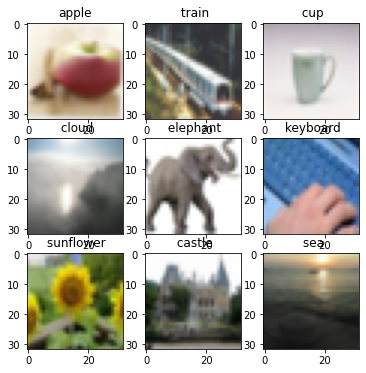

In [27]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

## Συναρτήσεις εκπαίδευσης

Θα χρησιμοποιήσουμε την ιδιότητα data prefetch του tf2:

In [0]:
# we user prefetch https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch 
# see also AUTOTUNE
# the dataset is now "infinite"

BATCH_SIZE = 128
AUTOTUNE = tf.data.experimental.AUTOTUNE # https://www.tensorflow.org/guide/data_performance

def _input_fn(x,y, BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.shuffle(buffer_size=data_size)
  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds =_input_fn(x_train,y_train, BATCH_SIZE) #PrefetchDataset object
validation_ds =_input_fn(x_val,y_val, BATCH_SIZE) #PrefetchDataset object
test_ds =_input_fn(x_test,y_test, BATCH_SIZE) #PrefetchDataset object

# steps_per_epoch and validation_steps for training and validation: https://www.tensorflow.org/guide/keras/train_and_evaluate

def train_model(model, epochs = 10, steps_per_epoch = 2, validation_steps = 1):
  history = model.fit(train_ds, epochs=epochs, steps_per_epoch=steps_per_epoch, validation_data=validation_ds, validation_steps=validation_steps)
  return(history)

## Γραφικές παραστάσεις εκπαίδευσης και απόδοση στο σύνολο ελέγχου

In [0]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	plt.figure(figsize=(8, 8))
	plt.suptitle('Training Curves')
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='val')
	plt.legend(loc='upper right')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='val')
	plt.legend(loc='lower right')
	return plt
 
# print test set evaluation metrics
def model_evaluation(model, evaluation_steps):
	print('\nTest set evaluation metrics')
	loss0,accuracy0 = model.evaluate(test_ds, steps = evaluation_steps)
	print("loss: {:.2f}".format(loss0))
	print("accuracy: {:.2f}".format(accuracy0))

def model_report(model, history, evaluation_steps = 10):
	plt = summarize_diagnostics(history)
	plt.show()
	model_evaluation(model, evaluation_steps)

## Μοντέλα δικτύων

### Ένα μικρό συνελικτικό δίκτυο "from scratch"

In [0]:
# a simple CNN https://www.tensorflow.org/tutorials/images/cnn

def init_simple_model(summary):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(100, activation='softmax'))
  model.compile(optimizer=tf.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [31]:
SIMPLE_MODEL = init_simple_model(summary = True)
SIMPLE_MODEL_history = train_model(SIMPLE_MODEL, 50, 30, 5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

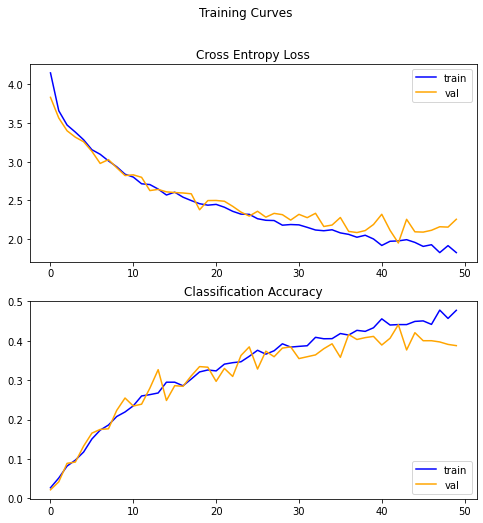


Test set evaluation metrics
30/30 [==============================] - 0s 6ms/step - loss: 2.0457 - accuracy: 0.4224
loss: 2.05
accuracy: 0.42


In [32]:
model_report(SIMPLE_MODEL, SIMPLE_MODEL_history, 30)

### Μεταφορά μάθησης: VGG16

In [0]:
# transfer learning: VGG16 trained on ImageNet without the top layer

def init_VGG16_model(summary):
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=(img_rows, img_cols, img_channels), include_top=False, weights='imagenet')

  # unfreeze conv layers
  VGG16_MODEL.trainable=True

  dropout_layer = tf.keras.layers.Dropout(rate = 0.5)
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

  # add top layer for CIFAR100 classification
  prediction_layer = tf.keras.layers.Dense(len(CIFAR100_LABELS_LIST),activation='softmax')
  model = tf.keras.Sequential([VGG16_MODEL, dropout_layer, global_average_layer, prediction_layer])
  model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00005), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])
  if summary: 
    model.summary()
  return model

In [34]:
VGG16_MODEL = init_VGG16_model(summary = True)
VGG16_MODEL_history = train_model(VGG16_MODEL, 25, 40, 10)

58892288/58889256 [==============================] - 6s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 512)         0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               51300     
Total params: 14,765,988
Trainable params: 14,765,988
Non-trainable params: 0
_________________________________________________________________
Train for 40 steps, validate for 10 steps
Epoch 1/25
40/40 [==============================] - 6s 141ms/step - loss: 4.2572 - accuracy: 0.0629 - val_loss: 3.5282 - val_accuracy

In [0]:
model_report(VGG16_MODEL, VGG16_MODEL_history, 30)

# Βελτίωση της επίδοσης με πειράματα

Καλείστε να βελτιώσετε τα αποτελέσματα ταξινόμησης στο CIFAR-100 και να βγάλατε συμπεράσματα, σύμφωνα με όσα ζητούνται σε σχέση με την αναφορά παράδοσης. 

## Δοκιμές διαφορετικών μοντέλων

Μπορείτε είτε να δοκιμάσετε μοντέλα "from scratch", όπου ορίζετε την αρχιτεκτονική του δικτύου όπως θέλετε, είτε να χρησιμοποιήσετε μεταφορά μάθησης.



### Μοντέλα "from scratch"

Μπορείτε να τροποποιήσετε/αλλάξετε το αρχικό μικρό συνελικτικό δίκτυο του παραδείγματος. Μπορείτε να συμβουλευτείτε 
- τη [βιβλιογραφία απο το leaderboard του CIFAR-100](https://benchmarks.ai/cifar-100) για αρχιτεκτονικές και παραμέτρους των δικτύων
- ή/και να πάρετε ιδέες [από σχετική αναζήτηση στο Google Scholar](https://scholar.google.gr/scholar?hl=en&as_sdt=0%2C5&q=cifar+100+cnn&oq=cifa)

### Μεταφορά μάθησης

Εναλλακτικά, μπορείτε να χρησιμοποιήσετ τη [μεταφορά μάθησης του tf2](https://www.tensorflow.org/tutorials/images/transfer_learning). Σε αντίθεση με τα μοντέλα "from scratch" η μεταφορά μάθησης μας επιστρέφει έτοιμα μοντέλα με προκαθορισμένη αρχιτεκτονική στην οποία μπορούμε γενικά μόνο να προσθέσουμε επίπεδα, τα οποία συνήθως περιορίζοντα σε πλήρως διασυνδεδεμένα επίπεδα που εξειδικεύονται στο συγκεκριμένο task ταξινόμησης που έχουμε να επιτελέσουμε. 

#### Εκπαίδευση βαρών

Ταυτόχρονα με την αρχιτεκτονική, στη μεταφορά μάθησης εισάγουμε και τη γνώση που έχει αποκτήσει το μοντέλο, δηλαδή τις τιμές των βαρών του όπως έχουν προκύψει μετά από εκπαίδευση συνήθως στο (τεράστιο) ImageNet. Οταν εισάγουμε ένα μοντέλο με μεταφορά μάθησης έχουμε τρεις επιλογές για την εκπαίδευση:
- να παγώσουμε τη συνελικτική βάση και να εκπαιδεύσουμε την κεφαλή ταξινόμησης (classification head). Αυτό αντιστοιχεί στο να χρησιμοποιήσουμε τη συνελικτική βάση για εξαγωγή χαρακτηριστικών (feature extraction), σημαία trainable = False.
- να συνεχίσουμε να εκπαιδεύουμε όλα τα επίπεδα του δικτύου, σημαία trainable = True.
- να εκπαιδευτεί μόνο ένα ποσοστό των επιπέδων, εβρισκόμενο προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.



#### Διαθέσιμα μοντέλα για μεταφορά μάθησης στο tf2

1. tf.keras.applications. Ο πιο απλός τρόπος για να κάνουμε μεταφορά μάθησης στο tf2 είναι μέσω του [tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications) που παρέχει προεκπαιδευμένα μοντέλα από το Keras και συγκεκριμένα τα δίκτυα: DenseNet, Inception-ResNet V2, Inception V3, MobileNet v1, MobileNet v2, NASNet-A, ResNet, ResNet v2, VGG16, VGG19 και Xception V1. Η εισαγωγή των μοντέλων γίνεται παρόμοια με αυτή που δείξαμε παραπάνω για το VGG16.

2. TensorFlow Hub. Μπορείτε επίσης να χρησιμοποιήσετε μοντέλα τα οποία είναι διαθέσιμα στο αποθετήριο [TensoFlow Hub](https://tfhub.dev/s?fine-tunable=yes&module-type=image-augmentation,image-classification,image-feature-vector,image-generator,image-object-detection,image-others,image-style-transfer,image-rnn-agent&tf-version=tf2) το οποίο περιλαμβάνει πάνω από 100 προεκπαιδευμένα μοντέλα.

3. Αποθηκευμένα μοντέλα απο τρίτες πηγές. Μπορείτε επίσης να κάνετε μεταφορά μάθησης από τρίτες πηγές, είτε του συνόλου του νευρωνικού, αρχιτεκτονικής και βαρών, είτε μόνο της αρχιτεκτονικής ή των βαρών. Το μοντέλο θα πρέπει να έχει αποθηκευθεί σε ένα από τα δύο φορμάτ, Keras HDF5 format (.h5 ή .keras) ή ως στο SavedModel format που αναφέραμε στην εισαγωγή. Τα βάρη μπορούν να εισαχθούν και μόνα τους ως Checkpoints. Για περισσότερα, διαβάστε σχετικά τα λήμματα ["Save and load models"](https://www.tensorflow.org/tutorials/keras/save_and_load), ["Save and serialize"](https://www.tensorflow.org/guide/keras/save_and_serialize), ["Using the SavedModel format"](https://www.tensorflow.org/guide/saved_model) και δείτε για παράδειγμα πως μπορούμε να κάνουμε μεταφορά μάθησης από τα state-of-the-art EfficientNets ([1](https://www.dlology.com/blog/transfer-learning-with-efficientnet/), [2](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnethttps://)).

Σημειώστε ότι πολλά μοντέλα απαιτούν μεγαλύτερες διαστάσεις στην είσοδο από αυτές του CIFAR-100 και κατά συνέπεια τα δεδομένα πρέπει να [μετασχηματιστούν](https://www.tensorflow.org/api_docs/python/tf/image/resize). Προσέξτε ωστόσο τις απαιτήσεις σε μνήμη όταν αυτοί οι μετασχηματισμοί γίνονται απευθείας σε μεταβλητές (βλ. πιο κάτω "Διαχείριση μνήμης"). 


## Παρατηρήσεις ως προς τη βελτιστοποίηση

### Διαχείριση μνήμης (TFRecord)

Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι καθόλου αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούνα να αναγνωστούν γραμμικά. Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε τα σχετικά λήμματα [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).



### Υπερεκπαίδευση

Μπορείτε να πειραματιστείτε ως προς τον έλεγχο της υπερεκπαίδευσης (overfitting) με διάφορους τρόπους. Μεταξύ αυτών μπορούμε να αναφέρουμε τους εξής:
- Πρόωρος τερματισμός (early stopping). Μια μέθοδος που τερματίζει την εκπαίδευση αν δεν υπάρχει βελτίωση ως προς τη μετρική απόδοσης που παρακολουθούμε. [tf.keras.callbacks.EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStoppinghttps://)
- Dropout. Μια άλλη τεχνική για τη μείωση της υπερεκπαίδευσης είναι το Dropout. Είναι ένα είδος ομαλοποίησης (regularization) που επιβάλλει στα βάρη του δικτύου να παίρνουν μόνο μικρές τιμές. Εάν εφαρμόσουε dropout σε ένα επίπεδο του δικτύου, τότε ένα ποσοστό των βαρών του γίνεται τυχαία μηδενικό κατά την εκπαίδευση. [Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout)
- Επαύξηση δεδομένων. Η υπερεκπαίδευση συνήθως συμβαίνει όταν έχουμε λίγα ή/και πολύ όμοια δεδομένα εκπαίδευσης. Ένας τρόπος να διορθωθεί αυτό το πρόβλημα είναι να αυξήσουμε τα δεδομένα (data augmentation). Το data augmentation δημιουργεί νέα δεδομένα εκπαίδευσης με βάση τα υπάρχοντα εφαρμόζοντας τυχαίους μετασχηματισμούς ώστε να προκύπτουν αληθοφανείς εικόνες. [Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)

Βλέπε επίσης [Image classification](https://www.tensorflow.org/tutorials/images/classification).

### Χρόνος εκπαίδευσης

Το TensorFlow 2 προσφέρει νέους ή βελτιώνει διάφορους μηχανισμούς βελτιστοποίησης της εκπαίδευσης. Μεταξύ αυτών έχουμε τους εξής:
- Data prefetching (το χρησιμοποιήσαμε παραπάνω)
- Data reading parallelization 
- Map transformation parallelization
- Caching
- Reducing memory footprint

Συμβουλευτείτε για τα παραπάνω το [Better performance with the tf.data API](https://www.tensorflow.org/guide/data_performance)

### Εργαλεία υψηλού επιπέδου

Μεταξύ των εργαλείων βελτιστοποίησης υψηλού επιπέδου (high-level) του TensorFlow μπορούμε να αναφέρουμε τα ακόλουθα:

- [TensorBoard](https://www.tensorflow.org/tensorboard/get_started) και [What-If Tool](https://www.tensorflow.org/tensorboard/what_if_tool) Επικουρικό εργαλείο οπτικοποίησης για τον πειραματισμό στη Μηχανική Μάθηση
- [tf-explain](https://tf-explain.readthedocs.io/en/latest/) Προσφέρει μεθόδους επεξηγισιμότητας για το tf2
- [Keras Tuner](https://github.com/keras-team/keras-tuner) Βελτιστοποίηση υπερπαραμέτρων του Keras στο TensorFlow 2.0
- [AutoAugment](https://github.com/tensorflow/models/tree/master/research/autoaugment) Εκμάθηση της πολιτικης επαύξησης από τα δεδομένα

# Easter eggs για το τέλος του μαθήματος Νευρωνικών 2019-2020



## What's next for Deep Learning

The Godfathers of AI and 2018 ACM Turing Award winners Geoffrey Hinton, Yann LeCun, and Yoshua Bengio shared a stage in New York on Sunday night at an event organized by the Thirty-Fourth AAAI Conference on Artificial Intelligence (AAAI 2020). The trio of researchers have made deep neural networks a critical component of computing, and in individual talks and a panel discussion they discussed their views on current challenges facing deep learning and where it should be heading.

In [0]:
from IPython.display import IFrame
IFrame(src='https://www.youtube.com/embed/UX8OubxsY8w', width=640, height=480)

## Αντίλογος: η κριτική του Schmidhuber για τους LeCun & Bengio & Hinton

(Ο Schmidhuber και ο Hochreiter [εισήγαγαν τα LSTM το 1997](https://www.bioinf.jku.at/publications/older/2604.pdf))

*Machine learning is the science of credit assignment. The machine learning community itself profits from proper credit assignment to its members. The inventor of an important method should get credit for inventing it. She may not always be the one who popularizes it. Then the popularizer should get credit for popularizing it (but not for inventing it). Relatively young research areas such as machine learning should adopt the honor code of mature fields such as mathematics: if you have a new theorem, but use a proof technique similar to somebody else's, you must make this very clear. If you "re-invent" something that was already known, and only later become aware of this, you must at least make it clear later.*

*As a case in point, let me now comment on a recent article in [Nature (2015) about "deep learning"](http://www.nature.com/nature/journal/v521/n7553/full/nature14539.html) in artificial neural networks (NNs), by LeCun & Bengio & Hinton (LBH for short), three CIFAR-funded collaborators who call themselves the "deep learning conspiracy" (e.g., LeCun, 2015). They heavily cite each other. Unfortunately, however, they fail to credit the pioneers of the field, which originated half a century ago. All references below are taken from the recent [deep learning overview](http://www.idsia.ch/~juergen/deep-learning-overview.html) (Schmidhuber, 2015), except for a few papers listed beneath this critique focusing on nine items.*

[Read more...](http://people.idsia.ch/~juergen/deep-learning-conspiracy.html)